In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from perovskite_prediction_api.common.storage import GoogleDriveStorage
from perovskite_prediction_api.common.credentials import google_credentials

In [148]:
storage = GoogleDriveStorage(google_credentials())
df = storage.download_dataframe("perovskite/prepared/data.csv")
df

,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
0,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,NaN,0.06,0,pin,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
1,SLG | ITO | PEDOT:PSS | Perovskite | PCBM-70 |...,NaN,0.06,0,pin,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.06,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47458,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.20,0,nip,False,False,nan; nan,False,0,...,0,0.0,Br,I,0,0,2.16,0.84,0.0,0
47459,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Cu...,NaN,0.25,0,nip,False,False,nan; nan,False,0,...,0,0.0,I,0,0,0,3,0,0.0,0
47460,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.15,0,nip,False,False,nan; nan,False,0,...,0,0.0,I,0,0,0,3,0,0.0,0
47461,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.12,0,nip,False,False,nan; nan,False,0,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


### We will predict TS80 - the time it took for that specific solar cell's efficiency to fall to 80% of its initial value (e.g., 500 hours, 1200 hours, 850 hours).

In [149]:
# drop na TS80
nan_mask = df["TS80"].isna()
print(f"NaN count in TS80 - {nan_mask.sum()}")
df = df[~nan_mask]
df

NaN count in TS80 - 41275


,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.06,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
5,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | BD...,NaN,0.09,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.45,2.55,0.0,0
6,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,NaN,0.16,0,nip,False,False,nan; nan,False,0,...,1,0.0,Br,I,0,0,0.369,2.631,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,SLG | FTO | SnO2 | Perovskite | Spiro-MeOTAD | Au,NaN,0.05,0,nip,False,False,nan; nan,False,0,...,0,0.0,0,0,0,0,0,0,0.0,0
6992,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
6993,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,NaN,0.04,0,nip,False,False,nan; nan,False,0,...,1,0.0,I,0,0,0,3,0,0.0,0
6994,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.16,0,nip,False,False,nan; nan,False,0,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


In [150]:
# we will check some columns for NaN and unknown values
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6188 entries, 2 to 6995
Data columns (total 280 columns):
 #    Column                                                          Non-Null Count  Dtype  
---   ------                                                          --------------  -----  
 0    Cell_stack_sequence                                             6188 non-null   object 
 1    Cell_area_total                                                 137 non-null    float64
 2    Cell_area_measured                                              6053 non-null   float64
 3    Cell_number_of_cells_per_substrate                              6188 non-null   int64  
 4    Cell_architecture                                               6188 non-null   object 
 5    Cell_flexible                                                   6188 non-null   bool   
 6    Cell_semitransparent                                            6188 non-null   bool   
 7    Cell_semitransparent_wavelength_range        

In [151]:
# drop some nan columns
threshold = 6000
columns_to_drop = [col for col in df.columns if df[col].isna().sum() > threshold]
columns_to_drop

['Cell_area_total',
 'Perovskite_deposition_quenching_media_mixing_ratios',
 'HTL_additives_concentrations',
 'JV_light_source_brand_name',
 'JV_light_mask_area',
 'JV_preconditioning_protocol']

In [152]:
df = df.drop(columns=columns_to_drop)
df

,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.06,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
5,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | BD...,0.09,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.45,2.55,0.0,0
6,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,0.16,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.369,2.631,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,SLG | FTO | SnO2 | Perovskite | Spiro-MeOTAD | Au,0.05,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,0,0,0,0,0,0,0.0,0
6992,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6993,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6994,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.16,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


In [153]:
# we do not need JV features - drop
df = df.drop(columns=[col for col in df.columns if col.startswith("JV")])
df

,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,...,B_1_coef,B_2_coef,C_1,C_2,C_3,C_4,C_1_coef,C_2_coef,C_3_coef,C_4_coef
2,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
3,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
4,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,0.06,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.51,2.49,0.0,0
5,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | BD...,0.09,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.45,2.55,0.0,0
6,SLG | FTO | SnO2-c | Perovskite | Spiro-MeOTAD...,0.16,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,Br,I,0,0,0.369,2.631,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,SLG | FTO | SnO2 | Perovskite | Spiro-MeOTAD | Au,0.05,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,0,0,0,0,0,0,0.0,0
6992,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6993,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | N2...,0.04,0,nip,False,False,nan; nan,False,0,False,...,1,0.0,I,0,0,0,3,0,0.0,0
6994,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.16,0,nip,False,False,nan; nan,False,0,False,...,0,0.0,Br,I,0,0,0.45,2.55,0.0,0


In [154]:
# extract the columns which we need
features_for_stability_model = [
    # --- Composition Features (The "Recipe") ---
    'Perovskite_composition_inorganic',
    'Perovskite_composition_leadfree',
    'Perovskite_band_gap',
    'A_1', 'A_2', 'A_3', 'A_4',
    'A_1_coef', 'A_2_coef', 'A_3_coef', 'A_4_coef',
    'B_1', 'B_2',
    'B_1_coef', 'B_2_coef',
    'C_1', 'C_2', 'C_3',
    'C_1_coef', 'C_2_coef', 'C_3_coef',

    # --- Architecture & Structure Features (The "Blueprint") ---
    'Cell_architecture',
    'Perovskite_dimension_2D',
    'Perovskite_dimension_3D',
    'Perovskite_dimension_2D3D_mixture',
    'Perovskite_dimension_3D_with_2D_capping_layer',
    'ETL_stack_sequence',
    'HTL_stack_sequence',
    'Backcontact_stack_sequence',

    # --- Fabrication & Process Features (The "Instructions") ---
    'Perovskite_deposition_procedure',
    'Perovskite_deposition_quenching_induced_crystallisation',
    'Perovskite_deposition_solvent_annealing',

    # --- Device & Test Condition Features ---
    'Cell_area_measured',
    'Encapsulation',
]
df = df[features_for_stability_model]
df

,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D_with_2D_capping_layer,ETL_stack_sequence,HTL_stack_sequence,Backcontact_stack_sequence,Perovskite_deposition_procedure,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation
2,False,False,1.60,MA,0,0,0,1,0,0,...,False,False,TiO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.04,False
3,False,False,1.60,MA,0,0,0,1,0,0,...,False,False,TiO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.04,False
4,False,False,1.59,Cs,FA,MA,0,0.05,0.788,0.162,...,False,False,TiO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.06,False
5,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,False,TiO2-c | TiO2-mp,BDT2FMeDPA,Carbon,Spin-coating,True,False,0.09,False
6,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,False,False,SnO2-c,Spiro-MeOTAD,Au,Spin-coating,True,False,0.16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,False,False,NaN,0,0,0,0,0,0,0,...,False,False,SnO2,Spiro-MeOTAD | MoO3,Au,Spin-coating,False,False,0.05,False
6992,False,False,NaN,MA,0,0,0,1,0,0,...,False,False,TiO2-c | TiO2-mp,"N2,N2,N12,N12-Tetrakis(4-methoxyphenyl)-9-meth...",Ag,Spin-coating,True,False,0.04,False
6993,False,False,NaN,MA,0,0,0,1,0,0,...,False,False,TiO2-c | TiO2-mp,"N2,N2,N12,N12-Tetrakis(4-methoxyphenyl)-9-meth...",Ag,Spin-coating,True,False,0.04,False
6994,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,False,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Spin-coating,True,False,0.16,False


In [155]:
# drop cell area measured NaN
df = df.dropna(subset=["Cell_area_measured"])
print("DF length -", df.shape[0])

DF length - 6053


In [156]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6053 entries, 2 to 6995
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Perovskite_composition_inorganic                         6053 non-null   bool   
 1   Perovskite_composition_leadfree                          6053 non-null   bool   
 2   Perovskite_band_gap                                      4216 non-null   float64
 3   A_1                                                      6053 non-null   object 
 4   A_2                                                      6053 non-null   object 
 5   A_3                                                      6053 non-null   object 
 6   A_4                                                      6053 non-null   object 
 7   A_1_coef                                                 6053 non-null   object 
 8   A_2_coef                         

In [157]:
# calculate features` octahedral and tolerance
from perovskite_prediction_api.features.calc_factors import compute_octahedral_factor, compute_tolerance_factor
from perovskite_prediction_api.features.structure_features import compute_effective_radii, compute_ionic_radius_ratios, \
    create_composition_dict

df["_composition"] = df.apply(lambda row: create_composition_dict(row), axis=1)
print("NaN compositions -", df["_composition"].isna().sum())

NaN compositions - 6


/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_81569/3058797150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_composition"] = df.apply(lambda row: create_composition_dict(row), axis=1)


In [158]:
df = df.dropna(subset=["_composition"])

df["effective_radii"] = df["_composition"].apply(compute_effective_radii)
df = df[~df["effective_radii"].isnull()]
df["r_A"] = df["effective_radii"].apply(lambda x: x[0])
df["r_B"] = df["effective_radii"].apply(lambda x: x[1])
df["r_C"] = df["effective_radii"].apply(lambda x: x[2])
df.drop(columns=["effective_radii"], inplace=True)
df["octahedral_factor"] = df.apply(
    lambda row: compute_octahedral_factor(row["r_B"], row["r_C"]), axis=1
)
df["tolerance_factor"] = df.apply(
    lambda row: compute_tolerance_factor(row["r_A"], row["r_B"], row["r_C"]), axis=1
)
df

,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,False,False,1.60,MA,0,0,0,1,0,0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
3,False,False,1.60,MA,0,0,0,1,0,0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
4,False,False,1.59,Cs,FA,MA,0,0.05,0.788,0.162,...,True,False,0.06,False,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ...",2.42868,1.19,2.15920,0.551130,0.968626
5,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,True,False,0.09,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228
6,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,True,False,0.16,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,False,False,1.63,MA,0,0,0,1,0,0,...,True,False,0.09,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6992,False,False,NaN,MA,0,0,0,1,0,0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6993,False,False,NaN,MA,0,0,0,1,0,0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6994,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,True,False,0.16,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162


In [159]:
# define space group
from perovskite_prediction_api.features.structure_features import get_space_group
from perovskite_prediction_api.entities.v1.structure import Dimensions


def get_dimension(row):
    if row['Perovskite_dimension_3D']:
        return Dimensions.THREE_DIM.value
    elif row['Perovskite_dimension_2D3D_mixture']:
        return Dimensions.TWO_THREE_DIM_MIXTURE.value
    elif row['Perovskite_dimension_2D']:
        return Dimensions.TWO_DIM.value
    else:
        return pd.NA


df["dimension"] = df.apply(lambda row: get_dimension(row), axis=1)
df["space_group"] = df.apply(lambda row: get_space_group(row["tolerance_factor"], row["dimension"]), axis=1)
df = df.drop(columns=["dimension"])
df = df.dropna(subset=["space_group"])
f"DF length - {df.shape[0]}"

'DF length - 6047'

### Predict NaN band gaps with Gradient Boost prepared model

In [160]:
df = df.rename(
    columns={
        "Perovskite_composition_inorganic": "inorganic_composition",
    }
)

In [161]:
df_band_gap_na = df[df["Perovskite_band_gap"].isna()]
df_band_gap_na

,inorganic_composition,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor,space_group
5,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,0.090,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228,Pm3m
6,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,False,0.160,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,Pm3m
7,False,False,NaN,Cs,FA,MA,0,0.05,0.827,0.123,...,False,0.160,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,Pm3m
10,True,False,NaN,Cs,0,0,0,1,0,0,...,False,0.100,False,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.16400,0.549908,0.808303,I4/mcm
18,True,False,NaN,Cs,0,0,0,1,0,0,...,False,0.040,False,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.12000,0.561321,0.809648,I4/mcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,False,False,NaN,MA,0,0,0,1,0,0,...,False,0.091,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,Pm3m
6992,False,False,NaN,MA,0,0,0,1,0,0,...,False,0.040,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,Pm3m
6993,False,False,NaN,MA,0,0,0,1,0,0,...,False,0.040,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,Pm3m
6994,False,False,NaN,FA,MA,0,0,0.85,0.15,0,...,False,0.160,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162,Pm3m


In [162]:
import os
from xgboost import XGBRegressor

fp = os.path.join(os.path.abspath(os.path.curdir), '..', 'saved_models', 'xgboost_band_gap_3D.json')
band_gap_model = XGBRegressor()
band_gap_model.load_model(fp)

In [163]:
from perovskite_prediction_api.entities.v1.elements import Elements
from perovskite_prediction_api.entities.v1.structure import SpaceGroup


def encode_ion(ion: str):
    if isinstance(ion, int) or ion == "0":
        return ion
    ion = ion.replace("(", "").replace(")", "").strip()
    element = Elements.get_element_by_name(ion)
    return element.code


# hot encode
df_band_gap_na["inorganic_composition"] = np.where(df_band_gap_na["inorganic_composition"], 1, -1)
df_band_gap_na["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)

ion_cols = ["A_1", "A_2", "A_3", "A_4", "B_1", "B_2", "C_1", "C_2", "C_3"]
for col in ion_cols:
    df_band_gap_na[col] = df_band_gap_na[col].apply(encode_ion).astype(int)

coef_cols = [f'{col}_coef' for col in ion_cols]
for col in coef_cols:
    df_band_gap_na[col] = df_band_gap_na[col].astype(float)
df_band_gap_na

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_81569/4289859910.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_band_gap_na["inorganic_composition"] = np.where(df_band_gap_na["inorganic_composition"], 1, -1)
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_81569/4289859910.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_band_gap_na["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_81569/42898

,inorganic_composition,Perovskite_composition_leadfree,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor,space_group
5,-1,False,NaN,2,1,0,0,0.85,0.150,0.000,...,False,0.090,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228,2
6,-1,False,NaN,3,2,1,0,0.05,0.827,0.123,...,False,0.160,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,2
7,-1,False,NaN,3,2,1,0,0.05,0.827,0.123,...,False,0.160,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702,2
10,1,False,NaN,3,0,0,0,1.00,0.000,0.000,...,False,0.100,False,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.16400,0.549908,0.808303,3
18,1,False,NaN,3,0,0,0,1.00,0.000,0.000,...,False,0.040,False,"{'A': {'Cs': 1.0}, 'B': {'Pb': 1.0}, 'C': {'Br...",1.67000,1.19,2.12000,0.561321,0.809648,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,-1,False,NaN,1,0,0,0,1.00,0.000,0.000,...,False,0.091,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,2
6992,-1,False,NaN,1,0,0,0,1.00,0.000,0.000,...,False,0.040,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,2
6993,-1,False,NaN,1,0,0,0,1.00,0.000,0.000,...,False,0.040,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521,2
6994,-1,False,NaN,2,1,0,0,0.85,0.150,0.000,...,False,0.160,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162,2


In [164]:
df_band_gap_na["Perovskite_band_gap"] = band_gap_model.predict(
    df_band_gap_na[
        ["inorganic_composition", "A_1", "A_2", "A_3", "A_1_coef", "A_2_coef", "A_3_coef", "B_1", "B_2", "B_1_coef",
         "B_2_coef", "C_1", "C_2", "C_3", "C_1_coef", "C_2_coef", "C_3_coef", "r_A", "r_B", "r_C", "octahedral_factor",
         "tolerance_factor", "space_group"]
    ]
)

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_81569/2606162317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_band_gap_na["Perovskite_band_gap"] = band_gap_model.predict(


In [165]:
df.loc[df["Perovskite_band_gap"].isna(), "Perovskite_band_gap"] = df_band_gap_na["Perovskite_band_gap"]

### Data analysis

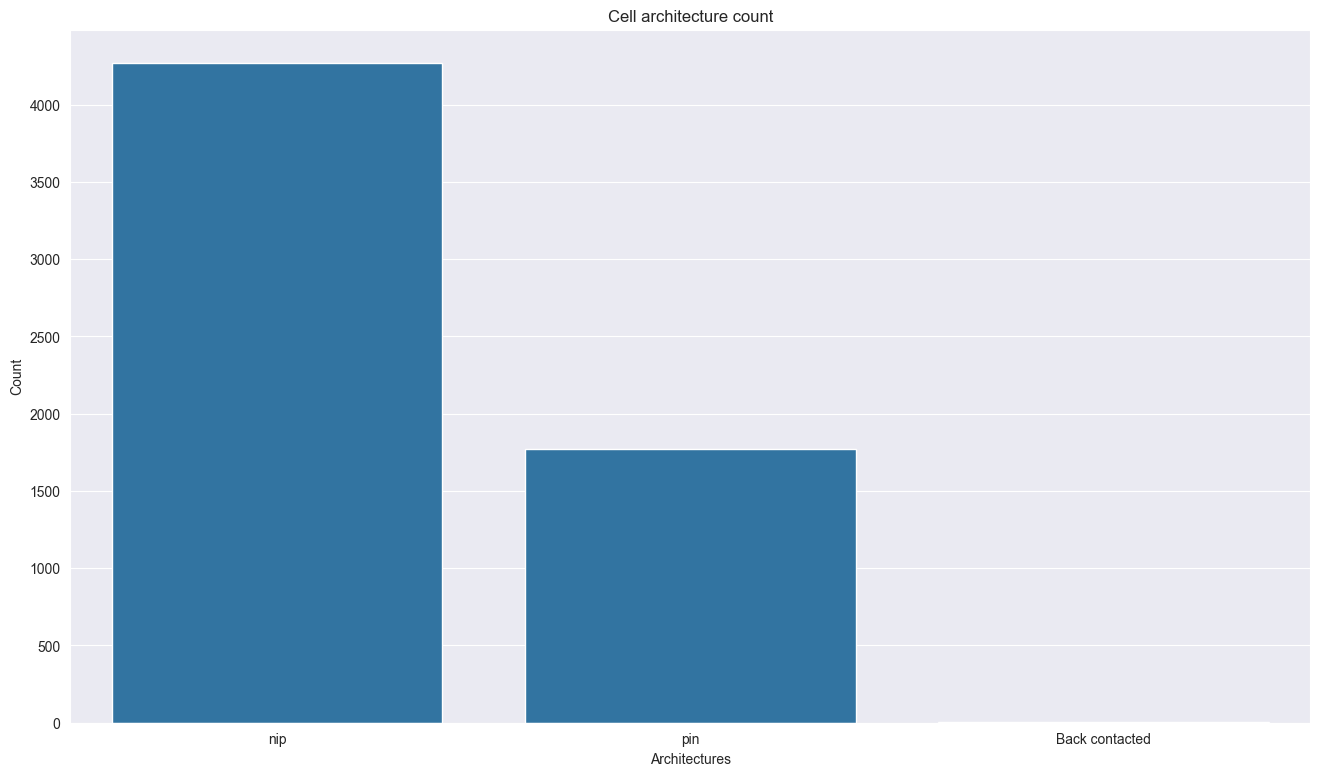

In [166]:
# check nip - pin architecture count
plt.figure(figsize=(16, 9))
architecture_value_counts = df["Cell_architecture"].value_counts()
sns.barplot(x=architecture_value_counts.index, y=architecture_value_counts.values)
plt.title("Cell architecture count")
plt.xlabel("Architectures")
plt.ylabel("Count")
plt.show()

In [167]:
# remove back contacted
df = df[~(df["Cell_architecture"] == "Back contacted")]

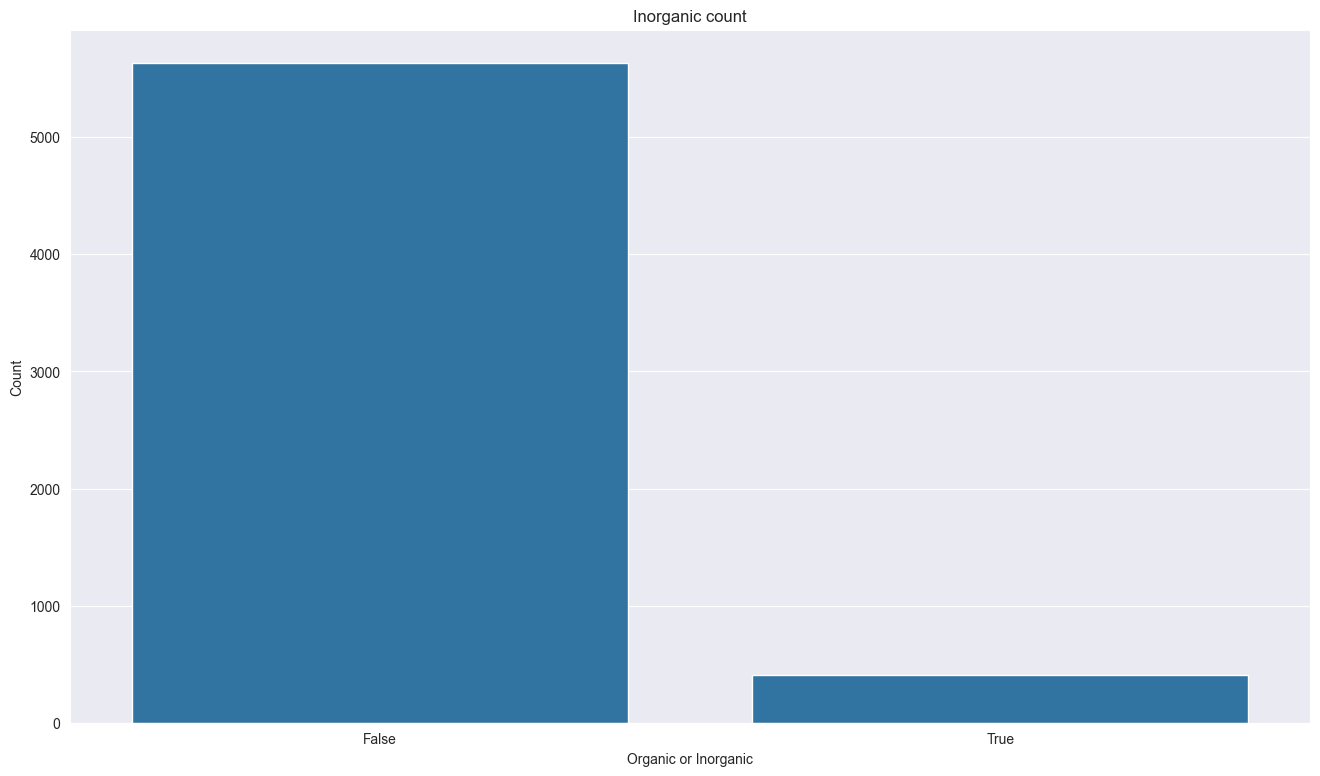

In [168]:
# check inorganic-organic
plt.figure(figsize=(16, 9))
inorganic_value_counts = df["inorganic_composition"].value_counts()
sns.barplot(x=inorganic_value_counts.index, y=inorganic_value_counts.values)
plt.title("Inorganic count")
plt.xlabel("Organic or Inorganic")
plt.ylabel("Count")
plt.show()

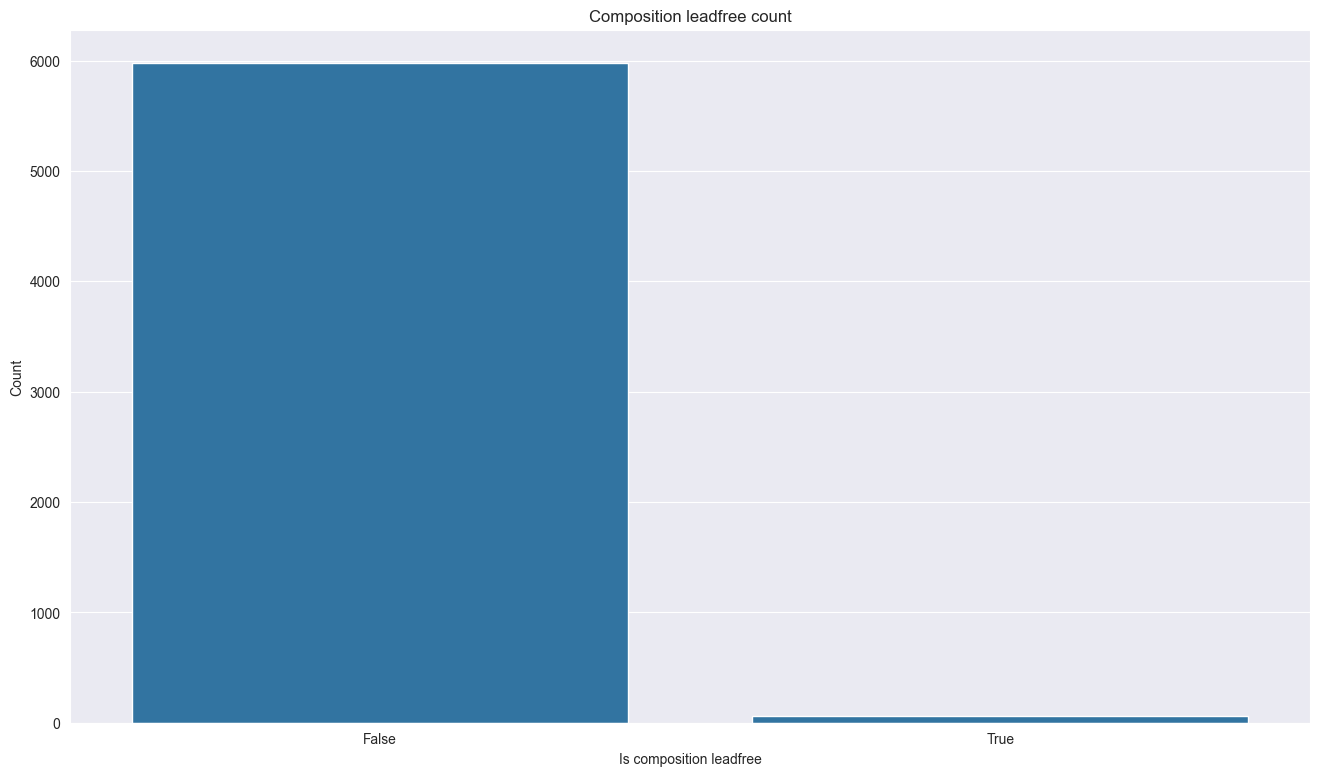

In [169]:
# check how many compositions leadfree
plt.figure(figsize=(16, 9))
leadfree_value_counts = df["Perovskite_composition_leadfree"].value_counts()
sns.barplot(x=leadfree_value_counts.index, y=leadfree_value_counts.values)
plt.title("Composition leadfree count")
plt.xlabel("Is composition leadfree")
plt.ylabel("Count")
plt.show()

In [170]:
# remove this feature at all
df = df.drop(columns=["Perovskite_composition_leadfree"])

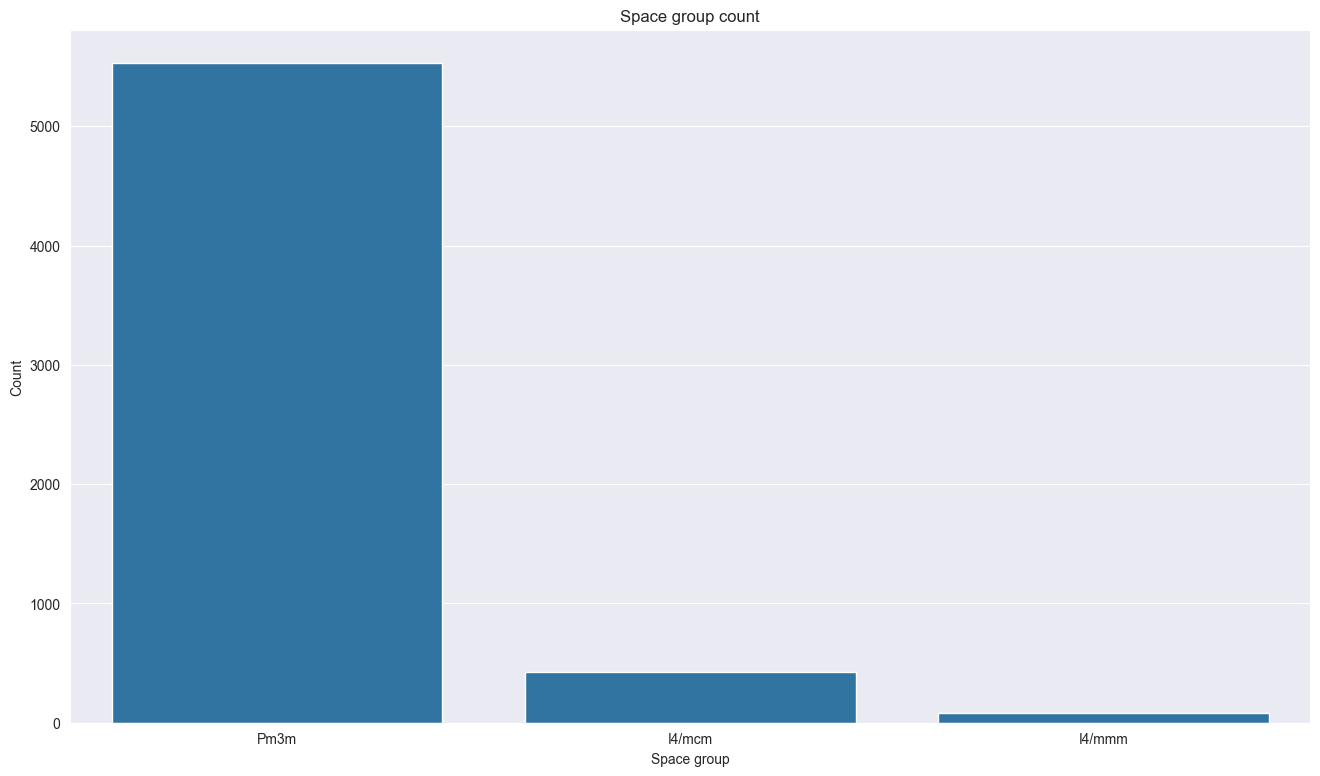

In [171]:
# check space groups
plt.figure(figsize=(16, 9))
space_group_value_counts = df["space_group"].value_counts()
sns.barplot(x=space_group_value_counts.index, y=space_group_value_counts.values)
plt.title("Space group count")
plt.xlabel("Space group")
plt.ylabel("Count")
plt.show()

In [172]:
# model will be trained for only cubic perovskites
df = df[df["space_group"] != SpaceGroup.CUBIC.value]
df = df.drop(columns=["space_group"])

In [173]:
# drop dimension related columns
df = df.drop(columns=["Perovskite_dimension_2D3D_mixture", "Perovskite_dimension_2D", "Perovskite_dimension_3D", "Perovskite_dimension_3D_with_2D_capping_layer"])

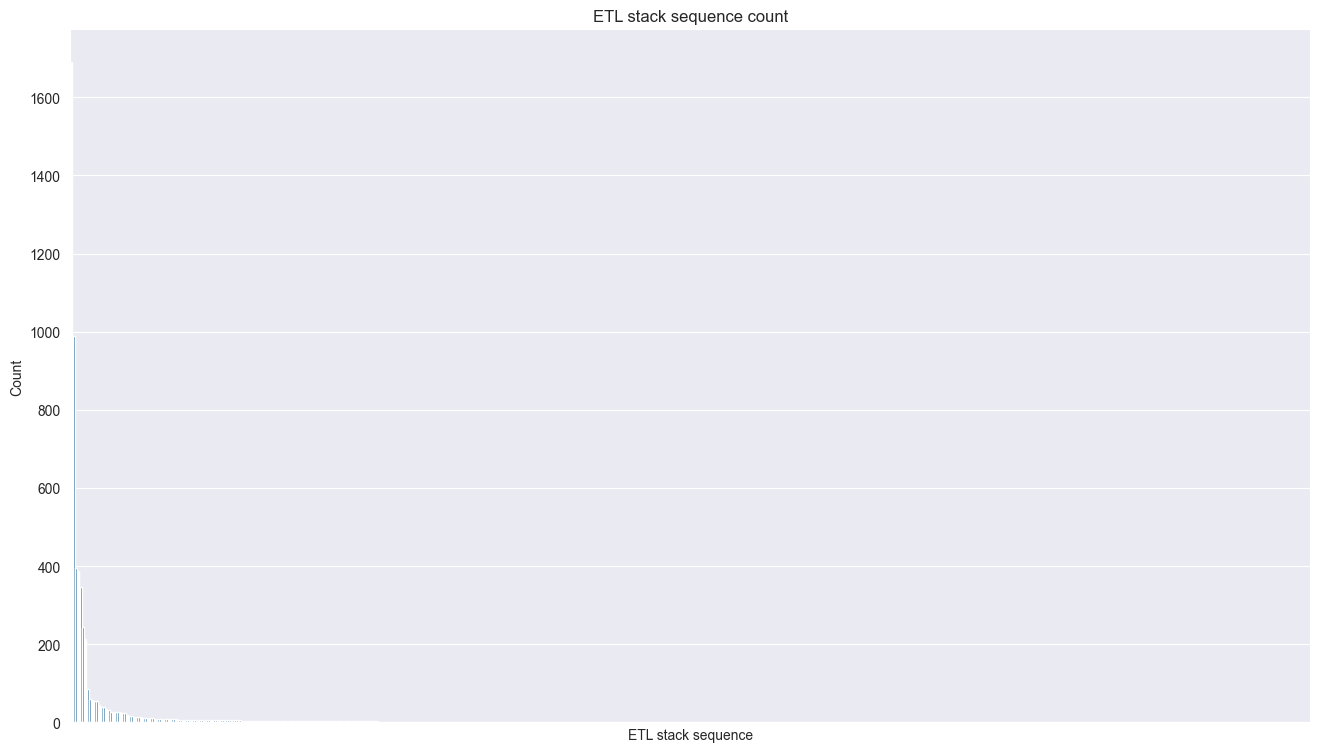

In [174]:
# check mapping result of ETL - clear in need
plt.figure(figsize=(16, 9))
etl_stack_sequence_counts = df["ETL_stack_sequence"].value_counts()
sns.barplot(x=etl_stack_sequence_counts.index, y=etl_stack_sequence_counts.values)
plt.title("ETL stack sequence count")
plt.xlabel("ETL stack sequence")
plt.xticks(ticks=[])
plt.ylabel("Count")
plt.show()

In [175]:
 # filter
etl_stack_sequence_threshold = 200
df = df[df['ETL_stack_sequence'].map(df['ETL_stack_sequence'].value_counts()) >= etl_stack_sequence_threshold]
df

,inorganic_composition,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,A_4_coef,...,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,False,1.600000,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
3,False,1.600000,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
4,False,1.590000,Cs,FA,MA,0,0.05,0.788,0.162,0.0,...,True,False,0.06,False,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ...",2.42868,1.19,2.15920,0.551130,0.968626
5,False,1.587281,FA,MA,0,0,0.85,0.15,0,0.0,...,True,False,0.09,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 1....",2.47600,1.19,2.16400,0.549908,0.978228
6,False,1.584191,Cs,FA,MA,0,0.05,0.827,0.123,0.0,...,True,False,0.16,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,False,1.630000,MA,0,0,0,1,0,0,0.0,...,True,False,0.09,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6992,False,1.647505,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6993,False,1.647505,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6994,False,1.446241,FA,MA,0,0,0.85,0.15,0,0.0,...,True,False,0.16,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162


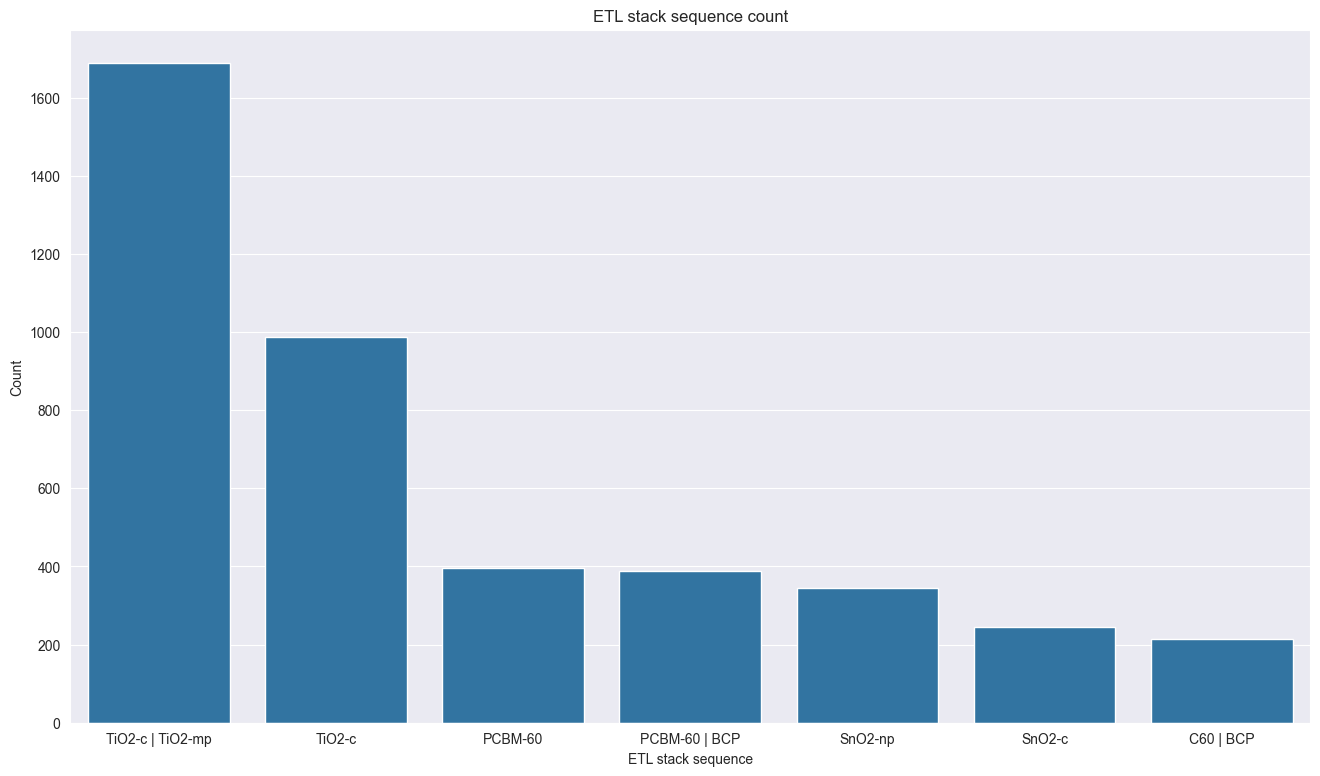

In [176]:
plt.figure(figsize=(16, 9))
etl_stack_sequence_counts = df["ETL_stack_sequence"].value_counts()
sns.barplot(x=etl_stack_sequence_counts.index, y=etl_stack_sequence_counts.values)
plt.title("ETL stack sequence count")
plt.xlabel("ETL stack sequence")
plt.ylabel("Count")
plt.show()

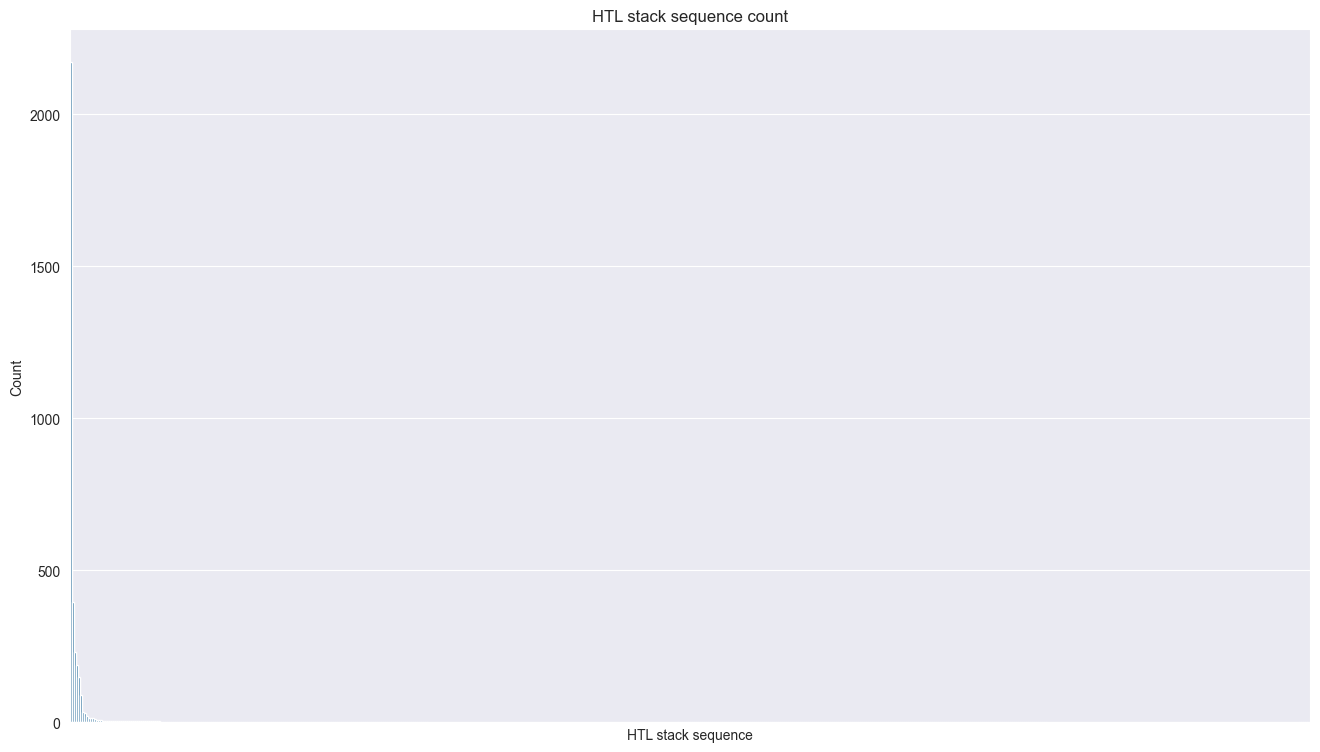

In [177]:
plt.figure(figsize=(16, 9))
htl_stack_sequence_counts = df["HTL_stack_sequence"].value_counts()
sns.barplot(x=htl_stack_sequence_counts.index, y=htl_stack_sequence_counts.values)
plt.title("HTL stack sequence count")
plt.xlabel("HTL stack sequence")
plt.xticks(ticks=[])
plt.ylabel("Count")
plt.show()

In [178]:
# drop HTL stack sequence cause it we will remain only one value
df = df.drop(columns=["HTL_stack_sequence"])

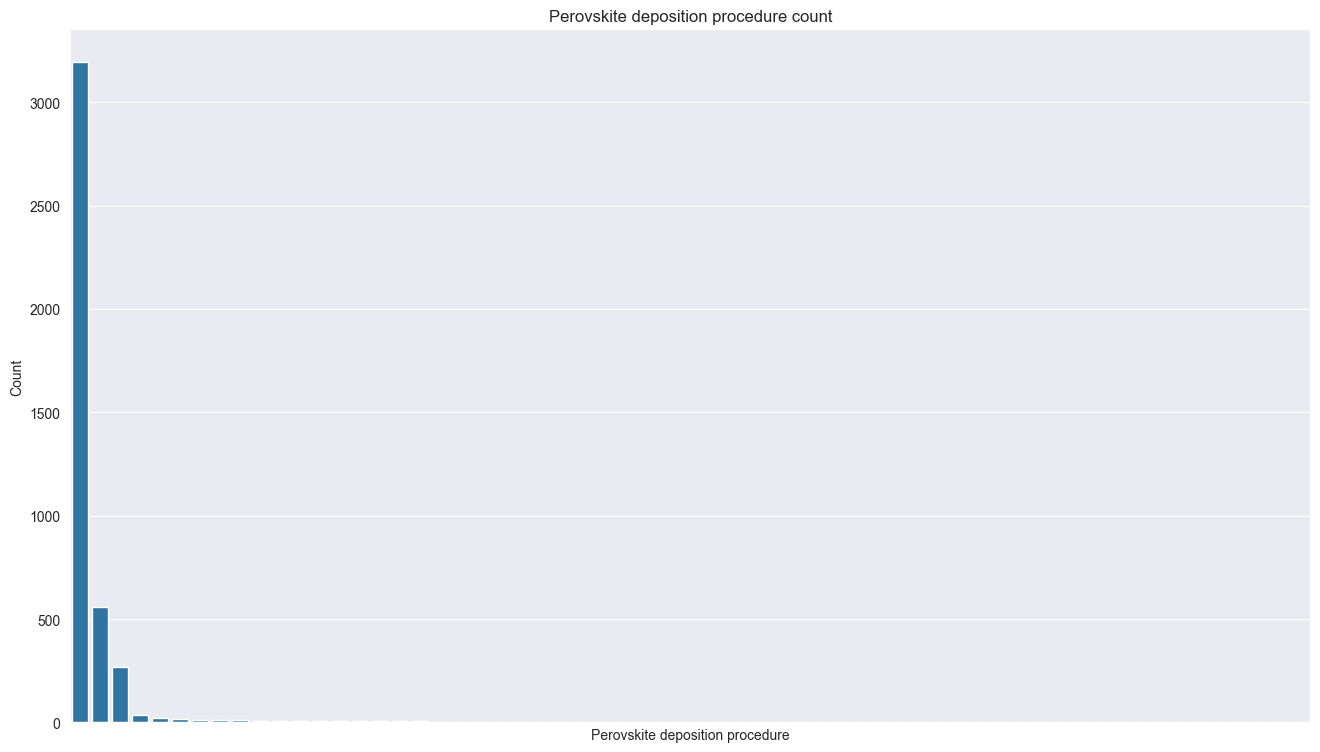

In [179]:
# check deposition procedure
plt.figure(figsize=(16, 9))
deposition_procedure_counts = df["Perovskite_deposition_procedure"].value_counts()
sns.barplot(x=deposition_procedure_counts.index, y=deposition_procedure_counts.values)
plt.xticks(ticks=[])
plt.title("Perovskite deposition procedure count")
plt.xlabel("Perovskite deposition procedure")
plt.ylabel("Count")
plt.show()

In [180]:
# same as HTL - drop
df = df.drop(columns=["Perovskite_deposition_procedure"])

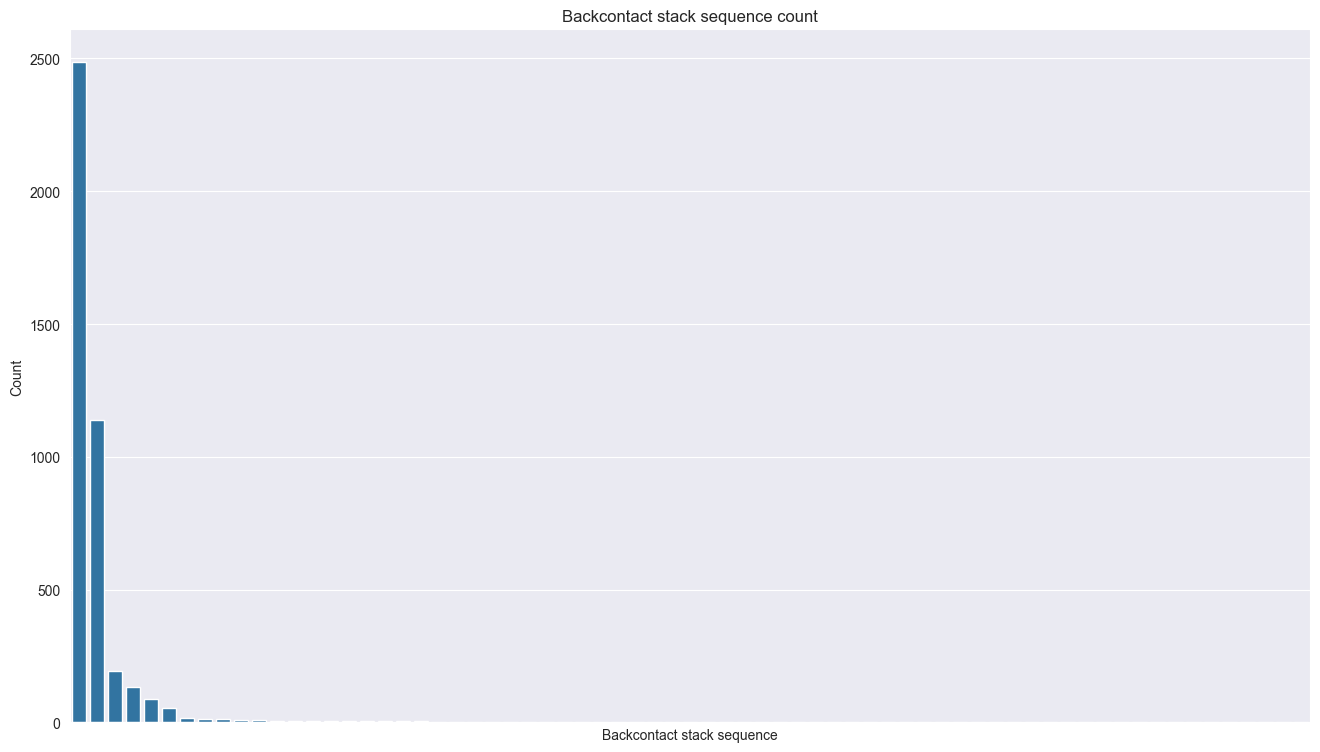

In [181]:
# check backcontact
plt.figure(figsize=(16, 9))
backcontact_counts = df["Backcontact_stack_sequence"].value_counts()
sns.barplot(x=backcontact_counts.index, y=backcontact_counts.values)
plt.xticks(ticks=[])
plt.title("Backcontact stack sequence count")
plt.xlabel("Backcontact stack sequence")
plt.ylabel("Count")
plt.show()

In [182]:
backcontact_counts

Backcontact_stack_sequence
Au                       2485
Ag                       1138
Carbon                    192
Al                        134
MoO3 | Ag                  87
                         ... 
Cu-ribbon                   1
rGO | Au                    1
Carbon | Carbon-fibre       1
Graphite | Cu-tape          1
MoO3 | AuAg | MoO3          1
Name: count, Length: 69, dtype: int64

In [185]:
values_to_keep = ["Au", "Ag"]
df = df[df["Backcontact_stack_sequence"].str.strip().isin(values_to_keep)]

In [186]:
df

,inorganic_composition,Perovskite_band_gap,A_1,A_2,A_3,A_4,A_1_coef,A_2_coef,A_3_coef,A_4_coef,...,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Cell_area_measured,Encapsulation,_composition,r_A,r_B,r_C,octahedral_factor,tolerance_factor
2,False,1.600000,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
3,False,1.600000,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
4,False,1.590000,Cs,FA,MA,0,0.05,0.788,0.162,0.0,...,True,False,0.06,False,"{'A': {'Cs': 0.05, 'FA': 0.788, 'MA': 0.162}, ...",2.42868,1.19,2.15920,0.551130,0.968626
6,False,1.584191,Cs,FA,MA,0,0.05,0.827,0.123,0.0,...,True,False,0.16,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
7,False,1.584191,Cs,FA,MA,0,0.05,0.827,0.123,0.0,...,True,False,0.16,False,"{'A': {'Cs': 0.05, 'FA': 0.827, 'MA': 0.123}, ...",2.44272,1.19,2.17048,0.548266,0.970702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,False,1.630000,MA,0,0,0,1,0,0,0.0,...,True,False,0.09,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6992,False,1.647505,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6993,False,1.647505,MA,0,0,0,1,0,0,0.0,...,True,False,0.04,False,"{'A': {'MA': 1.0}, 'B': {'Pb': 1.0}, 'C': {'I'...",2.17000,1.19,2.20000,0.540909,0.911521
6994,False,1.446241,FA,MA,0,0,0.85,0.15,0,0.0,...,True,False,0.16,False,"{'A': {'FA': 0.85, 'MA': 0.15}, 'B': {'Pb': 0....",2.47600,0.00,2.16400,0.000000,1.516162


### Encodings and build model

In [ ]:
import json

def create_and_save_mappings(df, categorical_cols, filepath):
    """
    Creates and saves label encoding mappings for categorical features.
    """
    mappings = {}
    for column in categorical_cols:
        # Using factorize to get both codes and unique values (the mapping)
        codes, uniques = pd.factorize(df[column])
        df[column] = codes  # Update the column with numerical codes
        # Create a dictionary mapping from category name to its code
        mappings[column] = {name: i for i, name in enumerate(uniques)}

    # Save the mappings dictionary to a JSON file
    with open(filepath, 'w') as f:
        json.dump(mappings, f, indent=4)

    print(f"Encoder mappings saved to '{filepath}'")
    return df, mappings